In [1]:
!pip install gql

In [2]:
get_ipython().system(' pip install yelp')

In [3]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sin, cos, sqrt, atan2, radians
from pprint import pprint
from yelp.client import Client
from yelp_api_key import yelp_client_id
from yelp_api_key import yelp_api_key
from urllib.parse import quote



%matplotlib notebook

from pandas.io.json import json_normalize

API_KEY = yelp_api_key
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.

DEFAULT_TERM = "restaurants"
DEFAULT_LOCATION = "1734 E 41st St. Los Angeles, CA"
DEFAULY_DISTANCE = 5
SEARCH_LIMIT = 50

def request(host, path, api_key, url_params=None):
    
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    print(u'Querying {0} ...'.format(url))
    response = requests.request('GET', url, headers=headers, params=url_params)
    return response.json()

response = request(host=API_HOST,
                  path=SEARCH_PATH,
                  api_key=API_KEY,
                  url_params={"location":DEFAULT_LOCATION, "term":DEFAULT_TERM, "limit": SEARCH_LIMIT})

pprint(response, indent = 4)

# df = pd.DataFrame.from_dict(json_normalize(response), orient='columns')

# df.head()

Querying https://api.yelp.com/v3/businesses/search ...
{   'businesses': [   {   'alias': 'trattoria-25-restaurant-vernon',
                          'categories': [   {   'alias': 'italian',
                                                'title': 'Italian'},
                                            {   'alias': 'venues',
                                                'title': 'Venues & Event '
                                                         'Spaces'}],
                          'coordinates': {   'latitude': 34.014241,
                                             'longitude': -118.2305961},
                          'display_phone': '(323) 587-1494',
                          'distance': 1258.2412402252126,
                          'id': '4fjCNwFoUFZqBqwBCbRoXg',
                          'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/MBd3A2bgY3TuruLohV2PTg/o.jpg',
                          'is_closed': False,
                          'location': {   'address1':

                          'url': 'https://www.yelp.com/biz/ste-101-los-angeles?adjust_creative=Z1PEVlvYcP4RAz9rakpF7A&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=Z1PEVlvYcP4RAz9rakpF7A'},
                      {   'alias': 'fogo-de-chão-brazilian-steakhouse-los-angeles-3',
                          'categories': [   {   'alias': 'steak',
                                                'title': 'Steakhouses'},
                                            {   'alias': 'brazilian',
                                                'title': 'Brazilian'}],
                          'coordinates': {   'latitude': 34.0476649355579,
                                             'longitude': -118.261218773154},
                          'display_phone': '(213) 228-4300',
                          'distance': 4793.767295640862,
                          'id': 'euIu-4rVEKrsAMMC8A0vZQ',
                          'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/nExZ4cyXEI

                                                                 'Los Angeles, '
                                                                 'CA 90026'],
                                          'state': 'CA',
                                          'zip_code': '90026'},
                          'name': 'La Pergoletta on Sunset',
                          'phone': '+12133185505',
                          'price': '$$',
                          'rating': 4.5,
                          'review_count': 100,
                          'transactions': [   'restaurant_reservation',
                                              'delivery'],
                          'url': 'https://www.yelp.com/biz/la-pergoletta-on-sunset-los-angeles-7?adjust_creative=Z1PEVlvYcP4RAz9rakpF7A&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=Z1PEVlvYcP4RAz9rakpF7A'},
                      {   'alias': 'badmaash-downtown-la-los-angeles',
                          'categories': [   {

In [4]:
lat = []
lon = []
business_name =[]
price = []
category = []
transactions = []
rating = []
review_count = []

for i in range(50):
    try:
        lat.append(response["businesses"][i]["coordinates"]["latitude"])
        lon.append(response["businesses"][i]["coordinates"]["longitude"])
        business_name.append(response['businesses'][i]['name'])
        
        category.append(response['businesses'][i]['categories'][0]['title'])
        transactions.append(response['businesses'][i]['transactions'])
        rating.append(response['businesses'][i]['rating'])
        review_count.append(response['businesses'][i]['review_count'])
        price.append(response['businesses'][i]['price'])
    except:
        price.append("NaN")
        pass
    continue
    
   
print(f"{len(lat)}")
print(f"{len(lon)}")
print(f"{len(business_name)}") 
print(f"{len(price)}") 
print(f"{len(category)}")
print(f"{len(transactions)}")
print(f"{len(rating)}")
print(f"{len(review_count)}")

50
50
50
50
50
50
50
50


In [5]:
print(json.dumps(response, indent = 4, sort_keys = True))

{
    "businesses": [
        {
            "alias": "trattoria-25-restaurant-vernon",
            "categories": [
                {
                    "alias": "italian",
                    "title": "Italian"
                },
                {
                    "alias": "venues",
                    "title": "Venues & Event Spaces"
                }
            ],
            "coordinates": {
                "latitude": 34.014241,
                "longitude": -118.2305961
            },
            "display_phone": "(323) 587-1494",
            "distance": 1258.2412402252126,
            "id": "4fjCNwFoUFZqBqwBCbRoXg",
            "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/MBd3A2bgY3TuruLohV2PTg/o.jpg",
            "is_closed": false,
            "location": {
                "address1": "2501 S Santa Fe Ave",
                "address2": "",
                "address3": null,
                "city": "Vernon",
                "country": "US",
                "display_ad

In [6]:
total_data = {"Latitude": lat, 
             "Longitude": lon, 
             "Restaurant Name": business_name, 
             "Category": category, 
             "Transactions": transactions, 
             "Rating": rating, 
             "Price Tag":price,
             "Review": review_count,
             }

total_data_df_rename = pd.DataFrame(total_data)
total_data_df_rename_sorted = total_data_df_rename.sort_values(by=["Review"], ascending=True).reset_index(drop=True)

total_data_df_rename_sorted.to_csv('~/Desktop/restaurants.csv', index=False)

In [7]:
#approximate radius of earth in miles
r = 3958.8

food_bank_lat = radians(34.007839)
food_bank_lon = radians(-118.241728)

lat1 = radians(34.002441)
lon1 = radians(-118.240555)


distance_lat = food_bank_lat - lat1
distance_lon = food_bank_lon - lon1

a = sin(distance_lat / 2)**2 + cos(lat1) * cos(food_bank_lat) * sin(distance_lon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = r * c

print(f"The distance is:{round(distance,4)} mi")

The distance is:0.379 mi


In [8]:
r = 3958.8

food_bank_lat = radians(34.007839)
food_bank_lon = radians(-118.241728)

distance_in_mi = []

for i in range(50):
    distance_lat = (food_bank_lat) - (radians(total_data_df_rename_sorted["Latitude"][i]))
    distance_lon = (food_bank_lon) - (radians(total_data_df_rename_sorted["Longitude"][i]))
    
    a = sin(distance_lat / 2)**2 + cos(radians(total_data_df_rename_sorted["Latitude"][i])) * cos(food_bank_lat) * sin(distance_lon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = r*c
    
#     distance_mi = f"{round(distance, 3)}mi"
    distance_in_mi.append(round(distance,3))
    
print(distance_in_mi)

[1.801, 2.477, 1.925, 3.318, 1.79, 4.969, 0.379, 1.992, 3.848, 2.785, 2.697, 0.858, 4.98, 1.274, 2.74, 1.251, 5.434, 1.362, 4.972, 0.776, 2.919, 1.317, 2.806, 1.356, 2.693, 2.61, 2.126, 3.009, 1.619, 2.941, 3.173, 2.969, 2.384, 2.934, 2.169, 2.95, 2.485, 2.844, 2.884, 2.712, 2.988, 3.076, 2.382, 3.261, 4.885, 2.886, 1.946, 3.711, 2.895, 2.629]


In [9]:
distance_df = pd.DataFrame({"Restaurant Name": business_name, 
                            "Distance to Food Bank(mi)": distance_in_mi, 
                            "Review Count":review_count,
                            "Delivery": transactions
                           })
distance_df_sorted_distance = distance_df.sort_values(by=["Distance to Food Bank(mi)"], ascending=True)
distance_df_sorted_review_count = distance_df.sort_values(by=["Review Count"], ascending=False)
distance_df_sorted_delivery = distance_df.sort_values(by=["Delivery"], ascending=False)
# .reset_index(drop=True)
# distance_df_sorted.to_csv('~/Desktop/Restaurant_Distance.csv', index=False)
distance_df_sorted_delivery

,Restaurant Name,Distance to Food Bank(mi),Review Count,Delivery
35,10e,2.950,627,"[restaurant_reservation, pickup]"
1,H&H Brazilian Steakhouse,2.477,354,"[restaurant_reservation, delivery, pickup]"
6,Rajas con Crema,0.379,82,"[restaurant_reservation, delivery, pickup]"
41,Sage Vegan Bistro - Echo Park,3.076,2248,"[restaurant_reservation, delivery, pickup]"
33,Industriel,2.934,1300,"[restaurant_reservation, delivery, pickup]"
48,La Pergoletta on Sunset,2.895,100,"[restaurant_reservation, delivery]"
19,The Burrow,0.776,258,"[restaurant_reservation, delivery]"
25,STE 101,2.610,13,[restaurant_reservation]
2,The Stanton DTLA,1.925,51,[restaurant_reservation]
47,The Venue,3.711,231,[restaurant_reservation]


In [10]:
distance_df.to_csv('~/Desktop/restaurants.csv', index=False)

In [11]:
x = distance_df[
                  (distance_df["Distance to Food Bank(mi)"]<= 3.0) 
                & (distance_df["Review Count"] >= 500) 
]
               
y = x.sort_values(by=["Delivery"], ascending=False)

y.head(15)
       
# males = df[(df[Gender]=='Male') & (df[Year]==2014)]

,Restaurant Name,Distance to Food Bank(mi),Review Count,Delivery
35,10e,2.950,627,"[restaurant_reservation, pickup]"
33,Industriel,2.934,1300,"[restaurant_reservation, delivery, pickup]"
42,Colori Kitchen,2.382,1631,"[delivery, restaurant_reservation, pickup]"
21,The Factory Kitchen,1.317,1333,"[delivery, pickup]"
45,Shekarchi Restaurant,2.886,547,"[delivery, pickup]"
20,Preux & Proper,2.919,1410,[delivery]
26,Fogo de Chão Brazilian Steakhouse,2.126,1130,[delivery]
31,71 Above,2.969,1862,[delivery]
32,Faith & Flower,2.384,2485,[delivery]
34,Little Sister,2.169,1560,[delivery]


In [13]:
# x = distance_df_sorted_delivery.loc[:,'[Delivery]']

In [ ]:
x

In [14]:
total_data_df_rename_sorted

,Latitude,Longitude,Restaurant Name,Category,Transactions,Rating,Price Tag,Review
0,34.033901,-118.241499,Burmese Please,Burmese,[],5.0,NaN,1
1,34.041910,-118.255160,9th St Ramen,Ramen,[],5.0,NaN,2
2,34.035015,-118.234305,The Ricans Food,Puerto Rican,"[delivery, pickup]",5.0,NaN,3
3,33.959986,-118.246576,Ying Hana Teriyaki,Japanese,[],5.0,NaN,5
4,34.033741,-118.241462,Mano Po,Filipino,[],5.0,NaN,7
5,34.063192,-118.297126,STE 101,Korean,[restaurant_reservation],4.5,$$,13
6,34.002441,-118.240555,El Buca Restaurant,Seafood,[],5.0,$,16
7,33.982590,-118.224955,Hana Teppanyaki,Teppanyaki,[delivery],5.0,NaN,26
8,33.975575,-118.186979,Nina’s Cafe Bar,French,[restaurant_reservation],4.5,$$,29
9,34.047759,-118.234983,Father’s Office,Gastropubs,[],4.0,NaN,38


In [15]:
total_data_df_rename_sorted["Category"].value_counts()

American (New)            7
Italian                   6
Steakhouses               3
Hot Dogs                  2
Cocktail Bars             2
Soul Food                 2
Mediterranean             2
American (Traditional)    2
Mexican                   2
Vietnamese                1
Filipino                  1
French                    1
Southern                  1
Barbeque                  1
Puerto Rican              1
Lounges                   1
Seafood                   1
Vegan                     1
Japanese                  1
Burmese                   1
Middle Eastern            1
Ramen                     1
Sandwiches                1
Gastropubs                1
Brazilian                 1
Indian                    1
Chicken Shop              1
Korean                    1
Teppanyaki                1
New Mexican Cuisine       1
Persian/Iranian           1
Name: Category, dtype: int64

In [25]:
replacements = {"Lounges": "Bar", "Bars": "Bar", "Cocktail Bars": "Bar", "Gastropubs": "Bar", "Japanese": "Asian",
                "Indian": "Asian", "Filipino": "Asian", "Teppanyaki": "Asian", "Asian Fusion": "Asian", "Thai": "Asian",
               "Middle Eastern": "Asian", "Vietnamese": "Asian", "Burmese": "Asian", "Italian": "European",
               "Mexican": "Latin", "Salvadoran": "Latin", "Brazilian": "Latin", "Puerto Rican": "Latin",
               "New Mexican Cuisine": "Latin", "American (New)": "American", "Hot Dogs": "American", 
               "Steakhouses": "American", "American (Traditional)": "American", "Soul Food": "American", 
               "Seafood": "American", "Sandwiches": "American", "Chicken Shop": "American", "Barbeque": "American",
               "Mediterranean": "European", "French": "European", "Vegan": "American", "Vegan": "American",
               "Vegan": "American", "Southern": "American", "Korean": "Asian", "Korean": "Asian", "Ramen": "Asian",
               "Persian/Iranian": "Asian"}
    

replacements

{'Lounges': 'Bar',
 'Bars': 'Bar',
 'Cocktail Bars': 'Bar',
 'Gastropubs': 'Bar',
 'Japanese': 'Asian',
 'Indian': 'Asian',
 'Filipino': 'Asian',
 'Teppanyaki': 'Asian',
 'Asian Fusion': 'Asian',
 'Thai': 'Asian',
 'Middle Eastern': 'Asian',
 'Vietnamese': 'Asian',
 'Burmese': 'Asian',
 'Italian': 'European',
 'Mexican': 'Latin',
 'Salvadoran': 'Latin',
 'Brazilian': 'Latin',
 'Puerto Rican': 'Latin',
 'New Mexican Cuisine': 'Latin',
 'American (New)': 'American',
 'Hot Dogs': 'American',
 'Steakhouses': 'American',
 'American (Traditional)': 'American',
 'Soul Food': 'American',
 'Seafood': 'American',
 'Sandwiches': 'American',
 'Chicken Shop': 'American',
 'Barbeque': 'American',
 'Mediterranean': 'European',
 'French': 'European',
 'Vegan': 'American',
 'Southern': 'American',
 'Korean': 'Asian',
 'Ramen': 'Asian',
 'Persian/Iranian': 'Asian'}

In [26]:
total_data_df_rename_sorted["Category"] = total_data_df_rename_sorted["Category"].replace(replacements)

# total_data_df_rename_sorted.Category.value_counts()
total_data_df_rename_sorted["Category"].value_counts()

American    22
Asian       10
European     9
Latin        5
Bar          4
Name: Category, dtype: int64

In [27]:
total_data_df_rename_sorted

,Latitude,Longitude,Restaurant Name,Category,Transactions,Rating,Price Tag,Review
0,34.033901,-118.241499,Burmese Please,Asian,[],5.0,NaN,1
1,34.041910,-118.255160,9th St Ramen,Asian,[],5.0,NaN,2
2,34.035015,-118.234305,The Ricans Food,Latin,"[delivery, pickup]",5.0,NaN,3
3,33.959986,-118.246576,Ying Hana Teriyaki,Asian,[],5.0,NaN,5
4,34.033741,-118.241462,Mano Po,Asian,[],5.0,NaN,7
5,34.063192,-118.297126,STE 101,Asian,[restaurant_reservation],4.5,$$,13
6,34.002441,-118.240555,El Buca Restaurant,American,[],5.0,$,16
7,33.982590,-118.224955,Hana Teppanyaki,Asian,[delivery],5.0,NaN,26
8,33.975575,-118.186979,Nina’s Cafe Bar,European,[restaurant_reservation],4.5,$$,29
9,34.047759,-118.234983,Father’s Office,Bar,[],4.0,NaN,38


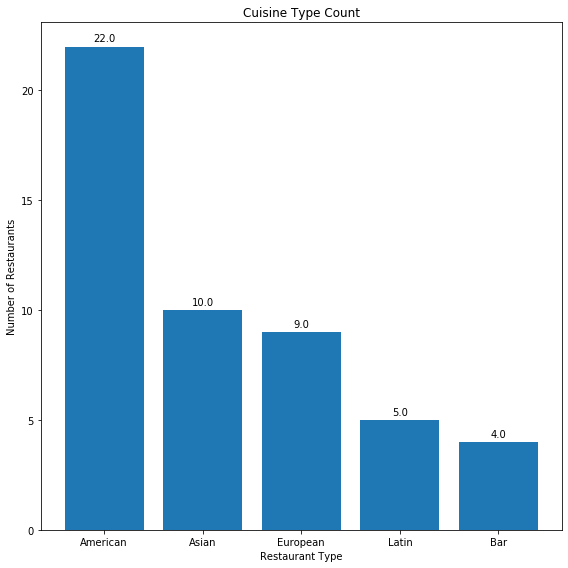

In [46]:
fig, ax = plt.subplots(figsize = (8,8))

# rating_plot = total_data_df["Rating"]
review_plot = total_data_df_rename_sorted["Restaurant Name"]
# business_name_plot = total_data_df_rename_sorted["Category"]

# ax.barh(business_name_plot,review_plot)
cat = total_data_df_rename_sorted["Category"].value_counts()
y_pos = np.arange(len(cat))
ax.bar(y_pos,cat)
ax.set_xticklabels(['','American','Asian','European','Latin','Bar'])
# ax.set_xlabel("Number of Restaurants")
# ax.set_ylabel("Restaurant Type")
ax.set_ylabel("Number of Restaurants")
ax.set_xlabel("Restaurant Type")

def add_value_labels(ax, spacing=3):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = "bottom"
        if y_value < 0:
            space *= -1
            va = "top"
        label = "{:.1f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)
# ax.set_xlim(2.5,24)

# ax.xaxis.set_tick_params(rotation=90)
ax.set_title("Cuisine Type Count")

fig.tight_layout()

fig.savefig("../ProjectOneOxJBO/Plot_cuisine_types_absolute_final_2.png")

In [ ]:
A = []
B = []
C = []
D = []

for i in range(50):